# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data !!!!!!!!!!

training_file = 'train.p'
testing_file = 'test.p' 

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

31


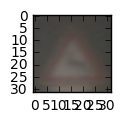

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import cv2
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
#image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#image = cv2.equalizeHist(image)
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

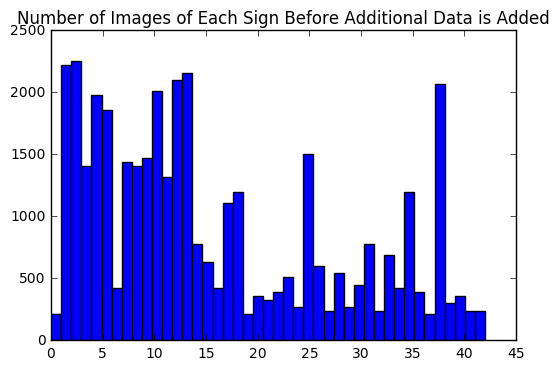

In [4]:
#Show data before additional data is added

plt.title('Number of Images of Each Sign Before Additional Data is Added')
plt.hist(y_train,bins=n_classes)
plt.show()

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from random import randint
print("Preprocessing now...")

print("Changing images to grayscale...")
X_train = np.sum(X_train/3,axis=3,keepdims=True)
X_test = np.sum(X_test/3,axis=3,keepdims=True)

print("Adding additional data...") #Certain traffic signs appear in the training set far less often than others, so add rotated versions of these underrepresented signs.
rotations = [-2,-1,1,2] #Possibly try randomly choosing a rotation value

totEachClass = np.bincount(y_train) #Determine the number of each signs in the training set
print(totEachClass)

for i in range(n_classes):
    if totEachClass[i] < 800:
        newLabels = []
        newFeatures = []
        currClassImgs = np.where(y_train == i) #Find all images in the current class
        for j in range(len(rotations)):
            for currImg in X_train[currClassImgs]:
                newLabels.append(i)
                newFeatures.append(scipy.ndimage.rotate(currImg,randint(-5,5),reshape=False))
        y_train = np.append(y_train,newLabels,axis=0)
        X_train = np.append(X_train,newFeatures,axis=0)

print("Rotations added, now normalize...")
X_train1 = (X_train/255.)*.8 +.1 
#X_train2 = (X_train-128)/128
X_train = X_train1
print("Normalization complete")
print(np.mean(X_train1))
#print(np.mean(X_train2))
totEachClass = np.bincount(y_train) #Determine the number of each signs in the training set
print(totEachClass)



Preprocessing now...
Changing images to grayscale...
Adding additional data...
[ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Rotations added, now normalize...
Normalization complete
0.356229579888
[1050 2220 2250 1410 1980 1860 2100 1440 1410 1470 2010 1320 2100 2160 3900
 3150 2100 1110 1200 1050 1800 1650 1950 2550 1350 1500 3000 1200 2700 1350
 2250 3900 1200 3445 2100 1200 1950 1050 2070 1500 1800 1200 1200]


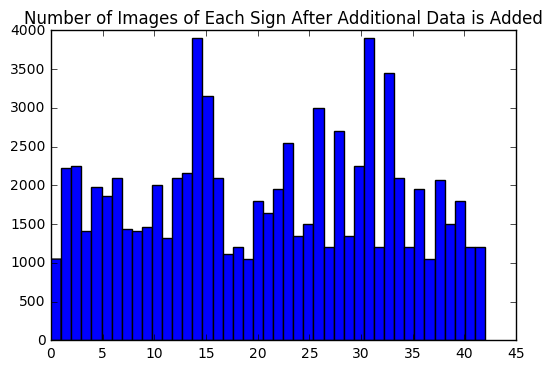

In [6]:
#Show data before additional data is added

plt.title('Number of Images of Each Sign After Additional Data is Added')
plt.hist(y_train,bins=len(totEachClass))
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The three ways in which I have preprocessed the data are as follows:
1. Converting all images to grayscale. This helped to reduce processing time and to increase validation accuracy.
2. Increasing the size of the dataset by adding additional images. For certain traffic sign classes, there were only about 200 images in the dataset. In order to combat this, for every traffic sign class with fewer than 800 images I quadrupled the number of total images for that traffic sign class. This was done by adding four new images per existing image that were randomly rotated between -5 and +5 degrees. By increasing the total amount of data, there was a lower likelihood of the resulting network being biased by certain types of images.
3. Normalizing all of the images. The purpose of doing this was to lower the mean of the dataset. The equation that I followed came from the curriculum and is as follows: X_train_normalized = (X_train/255.)*.8 +.1 

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=.2,random_state=45622)

print("Updated image shape: {}".format(X_train[0].shape))
print("Preprocessing complete")

Updated image shape: (32, 32, 1)
Preprocessing complete


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

As described in my previous answer, I added additional images to the dataset in order to reduce bias towards traffic signs that existed in the original dataset in very high quantities. In order to create my validation and training sets, I used the train_test_split function in order to randomly assign 20% of the original training data to be the validation data. Additionally, before the sets were split, the training data set was randomized to further ensure that the distribution of images in the validation set would be even.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 300

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
        
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)

    fc1 = tf.nn.dropout(fc1,keep_prob) 
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2,keep_prob)    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
        
    return logits

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

As I began testing the LeNet architecture that was provided in one of the labs, I found the validation accuracy was pretty high (about 95% before any major changes in the architecture or preprocessing were made), so I decided to keep it largely unchanged. The only major change that I made to LeNet was adding dropout in between the first and second and the second and third fully connected layers. I added dropout in order to reduce the likelihood of overfitting to the training set. By randomly dropping half of the data in between two layers, the network can not grow dependent upon on certain results, thus lowering the possibility for overfitting. The removal of overfitting is beneficial because it allows the network to work in more general situations (such as seeing unfamiliar images). I found that my validation accuracy had improved significantly once this was added, so I was confident that I was moving in the right direction. The following steps show the process behind this architecture:

1. Layer 1 - Convolutional: Input is image with shape 32x32x1, output is 28x28x6
2. ReLU Activation
3. Max pooling: input is 28x28x6, output is 14x14x6
4. Layer 2 - Convolutional: Input is 14x14x6, output is 10x10x16
5. ReLU Activation
6. Max pooling: Input is 10x10x16, ouput is 5x5x16
7. Flatten the output of step 6 in order to make it one-dimensional. Input shape is 5x5x16, output is 400
8. Layer 3 - Fully Connected: Input is 400, output is 120
9. ReLU Activation
10. Dropout (implemented to reduce overfitting)
11. Layer 4 - Fully Connected: Input is 120, output is 84
12. ReLU Activation
13. Dropout (implemented to reduce overfitting)
14. Layer 5 - Fully Connected: Input is 84, output is 43
15. Return the output (logits)


**Answer:**

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001
keep_prob = tf.placeholder(tf.float32)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #sess.run(logits, feed_dict={keep_prob: 0.5})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #sess.run(logits, feed_dict={keep_prob: prob})
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.647

EPOCH 2 ...
Validation Accuracy = 0.830

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.914

EPOCH 5 ...
Validation Accuracy = 0.935

EPOCH 6 ...
Validation Accuracy = 0.943

EPOCH 7 ...
Validation Accuracy = 0.953

EPOCH 8 ...
Validation Accuracy = 0.959

EPOCH 9 ...
Validation Accuracy = 0.960

EPOCH 10 ...
Validation Accuracy = 0.970

EPOCH 11 ...
Validation Accuracy = 0.971

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.976

EPOCH 14 ...
Validation Accuracy = 0.978

EPOCH 15 ...
Validation Accuracy = 0.979

EPOCH 16 ...
Validation Accuracy = 0.982

EPOCH 17 ...
Validation Accuracy = 0.982

EPOCH 18 ...
Validation Accuracy = 0.986

EPOCH 19 ...
Validation Accuracy = 0.985

EPOCH 20 ...
Validation Accuracy = 0.985

EPOCH 21 ...
Validation Accuracy = 0.986

EPOCH 22 ...
Validation Accuracy = 0.987

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:**

-Optimizer: The Adam Optimizer was used in the LeNet lab and appeared to be working well, so I did not change to a different optimizer.

-Batch Size: For a long time I used a batch size of 100, but near the end of development I read that low batch sizes could lead to an increase in noise and that the only real drawback to using a larger batch size was longer processing time (which I could justify since I've used AWS for this project). Ultimately, I settled on a batch size of 300.

-Epochs: I frequently changed the number of epochs during testing, and I found that validation accuracy normally became stable after around 30-35 epochs. With that in mind, I used 50 epochs as a way to make sure that the validation accuracy was at a maximum (and error was at the absolute minimum, not at a relative minimum).

-Hyperparameters: I left the hyperparameters the same as they were in the LeNet lab.

-Training rate: I, ultimately, left the training rate at the recommended amount from the LeNet lab: .001

-Dropout keep probability: 0.5, which was the rate recommended in the lectures.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Although I attempted to recreate architectures described in research papers, I decided to stay with the LeNet architecture. It worked well because it was shown to work well for similar images in the LeNet lab. Once I decided that the LeNet architecture with added dropout was sufficient for solving this problem, I carried on with trial and error for fine tuning the number of epochs, the training rate, etc.

The part of this solution that was the most taxing was determining the best preprocessing method. I read in a research paper (http://people.idsia.ch/~juergen/nn2012traffic.pdf on page 7) that histogram equalization was a very good preprocessing method. I spent hours trying to implement this with diminishing results, so I decided to stick with the preprocessing method that I described in an earlier answer.

In [14]:
#Test the accuracy on the test set

X_test_normalize1 = (X_test/255.)*.8 +.1 
X_test_normalize2 = (X_test-128)/128
X_test_normalize = X_test_normalize1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalize, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.945


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(8, 32, 32, 3)
(8, 32, 32, 1)


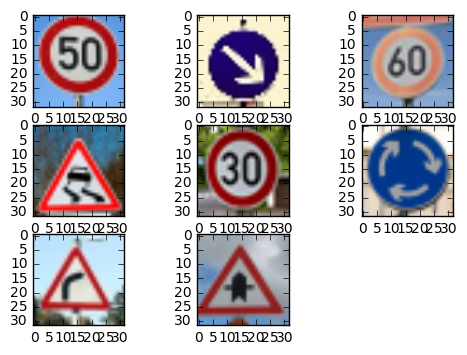

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import cv2 
imgDir = glob.glob('./newTestImgs/*.png')

testImgs = []
i = 1
for img in imgDir:
    #colorImg = mpimg.imread(img)
    colorImg = cv2.imread(img)
    colorImg = cv2.cvtColor(colorImg,cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i)
    plt.imshow(colorImg)
    testImgs.append(colorImg)
    i+=1


testImgs = np.asarray(testImgs)
print(testImgs.shape)  
testImgs_gray = np.sum(testImgs/3,axis=3,keepdims=True)
testImgs_normal = (testImgs_gray/255.)*.8 +.1 
print(testImgs_normal.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._


Of the images that I used, I thought that the image of the slippery road sign would be the hardest to classigy since it is a Russian road sign. I would also guess that signs that are not completely contained within the image (some of the sign was cropped out) would be difficult to classify.


**Answer:**

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

testImgLabels = [2,38,3,23,1,40,20,11]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(testImgs_normal, testImgLabels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.875


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model was not able to perform as well on the images that I found, it had an accuracy of 87.5%. With that being said, it is hard to make an absolute judgement on how it would run on any new data since I only tested it on 8 new images. 

Image number: 1  Correct image ID: 2

first guess: 40 (100%)
second guess: 0 (0%)
third guess: 17 (0%)

This image was classified incorrectly

------------------------

Image number: 2  Correct image ID: 38

first guess: 38 (100%)
second guess: 34 (0%)
third guess: 14 (0%)

This image was classified correctly

------------------------

Image number: 3  Correct image ID: 3

first guess: 3 (96%)
second guess: 5 (4%)
third guess: 20 (0%)

This image was classified correctly

------------------------

Image number: 4  Correct image ID: 23

first guess: 23 (100%)
second guess: 20 (0%)
third guess: 16 (0%)

This image was classified correctly

------------------------

Image number: 5  Correct image ID: 1

first guess: 1 (100%)
second guess: 2 (0%)
third guess: 4 (0%)

This image was classified correctly

------------------------

Image number: 6  Correct image ID: 40

first guess: 40 (99%)
second guess: 12 (1%)
third guess: 11 (0%)

This image was classified correctly

---------------------

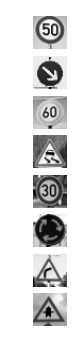

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: testImgs_normal, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: testImgs_normal, keep_prob: 1.0})

    for i,image in enumerate(testImgs_normal):
        i+=1
        plt.subplot(len(testImgs_normal),1,i)
        plt.axis('off')
        plt.imshow(image.squeeze(), cmap='gray')
        i -= 1
        print('Image number: {}'.format(i+1), ' Correct image ID: {}\n'.format(testImgLabels[i]))
        first_guess = my_top_k[1][i][0]
        first_index = np.argwhere(y_validation == first_guess)[0]
        print('first guess: {} ({:.0f}%)'.format(first_guess, 100*my_top_k[0][i][0]))
        
        second_guess = my_top_k[1][i][1]
        second_index = np.argwhere(y_validation == second_guess)[0]
        print('second guess: {} ({:.0f}%)'.format(second_guess, 100*my_top_k[0][i][1]))
        
        third_guess = my_top_k[1][i][2]
        third_index = np.argwhere(y_validation == third_guess)[0]
        print('third guess: {} ({:.0f}%)\n'.format(third_guess, 100*my_top_k[0][i][2]))
        
        if testImgLabels[i] == first_guess:
            print('This image was classified correctly\n')
        else:
            print('This image was classified incorrectly\n')
        
        print('------------------------\n')
        
        

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Of the 8 images that I used, the least confident guess that was made had a confidence of 92%, while most other guesses were much closer to 100% confident. It is interesting that the only image that the network did not correctly guess had 100% confidence that its answer was correct. This incorrect guess occurred for image number 1, and the correct guess did not appear in the top three guesses. Overall, the model tends to be highly confident with its guesses.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.